# Spitzer Seminar Demonstration Notebook
## Apr 26, 2024
Ryan Miller

----

# I. Numerical Methods Demonstration

## 1-D Heat Equation (2nd Order PDE):
# $u_{t}$ = $\gamma$$u_{xx}$ =
# $\frac{\partial{u}}{\partial{t}}$ = $\gamma$$\frac{\partial^2{u}}{\partial{x}^2}$
#### where $\gamma$ = diffusion coefficient (also given as 'D')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display, clear_output
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

import sympy as sp # Not needed but imported for potential future use
import heat_equations as h_e

## Solving Heat Equation (Linear, Second Order PDE)

### EX. 1:
u(t,0) = u(t,L) = 0

u(0,x) = x * (x - 1) * (x - 3)

D = 5

In [2]:
# Must create input boundary functions
def f_u_0_x(x):
    return x*(x-1)*(x-3)

def f_u_t_0(t):
    return 0

def f_u_t_L(t):
    return 0

In [7]:
D = 2
L = 3
dx = .1
dt = .1
t_max = 3

In [8]:
Te = h_e.heat_1d_explicit(f_u_0_x, D, dx, L, f_u_t_0, f_u_t_L, t_max, dt_mod=1)
Ti = h_e.heat_1d_implicit(f_u_0_x, D, dx, dt, L, f_u_t_0, f_u_t_L, t_max)
Tcr = h_e.crank_nicholson_1d(f_u_0_x, D, dx, dt, L, f_u_t_0, f_u_t_L, t_max)

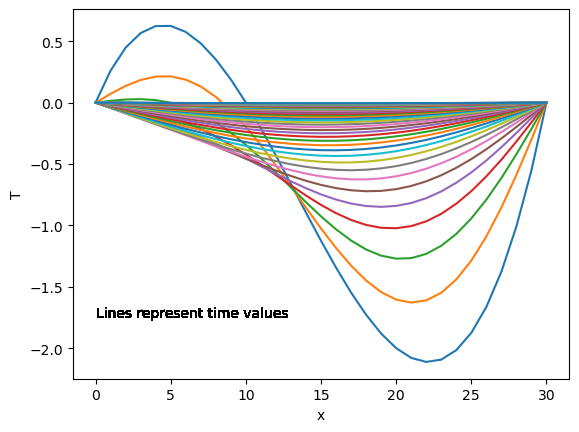

In [9]:
img_col = Image.open('colorful.png')
display(img_col)

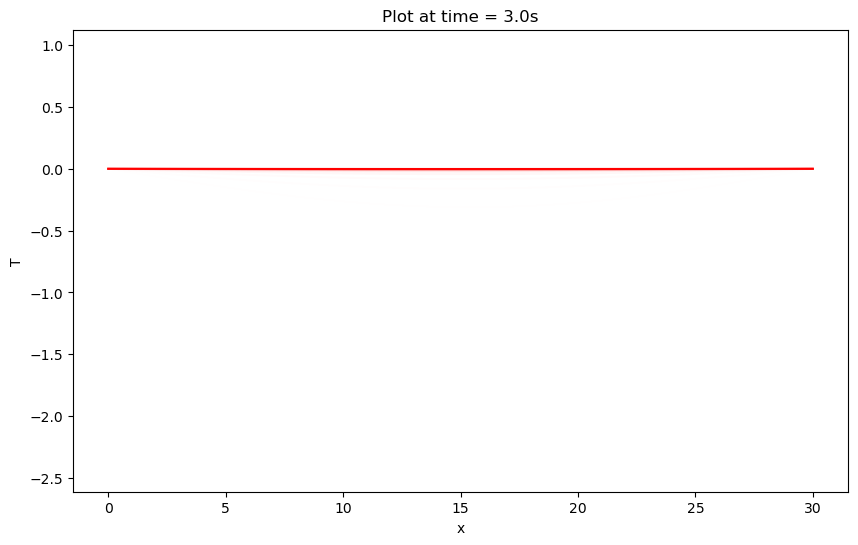

In [10]:
h_e.heat_plotter(Te,t_max,10)

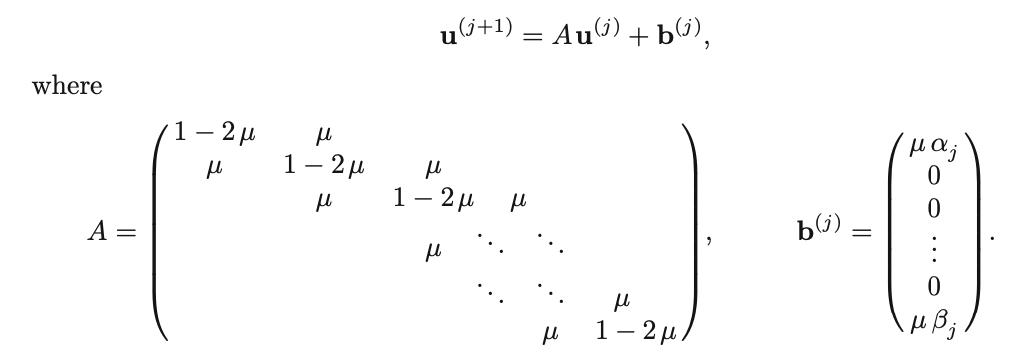

In [11]:
img_i = Image.open('img_i.png')
display(img_i)

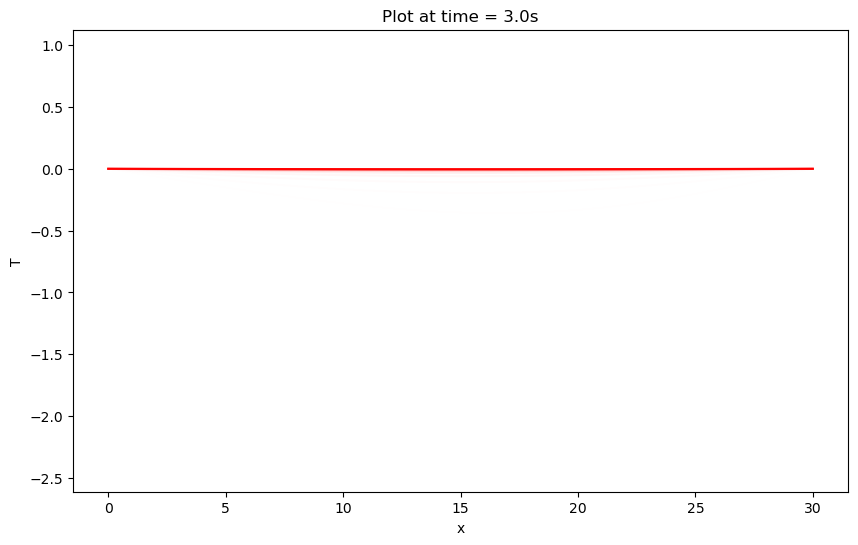

In [12]:
h_e.heat_plotter(Ti,t_max,10)

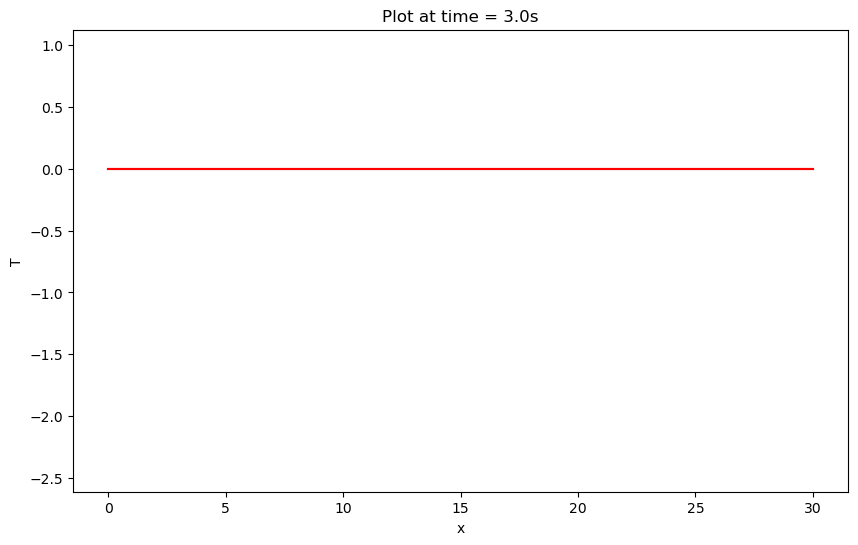

In [14]:
h_e.heat_plotter(Tcr,t_max,10)

### EX. 2:
u(t,0) = 50*e^(t/5)

u(t,L) = t^3

u(0,x) = 20

D = .5

In [15]:
# Must create input boundary functions
def f_u_0_x(x):
    return 20

def f_u_t_0(t):
    return 50*np.exp(-t/5)

def f_u_t_L(t):
    return t**3

D = 5
L = 3
dx = .1
dt = .1
t_max = 3

Tcr_2 = h_e.crank_nicholson_1d(f_u_0_x, D, dx, dt, L, f_u_t_0, f_u_t_L, t_max)

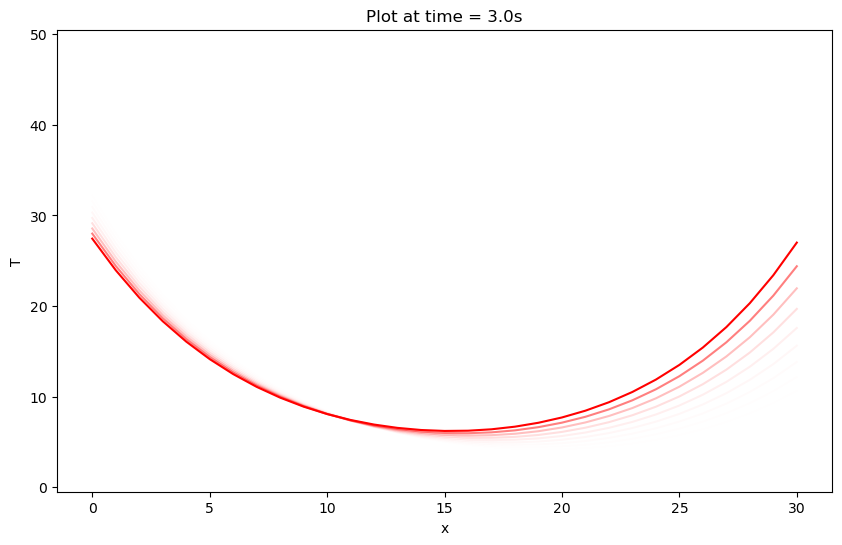

In [16]:
h_e.heat_plotter(Tcr_2, t_max, 20)

### EX. 3:
u(t,0) = 0

u(t,L) = 0

u(0,x) = Piecewise Function

D = .01

In [17]:
def f3(x):
    if x < (1/3):
        return 2*abs(x-(1/6))-(1/3)
    elif x < (2/3):
        return 0
    else:
        return (1/2)-3*abs(x-(5/6))
    
D = .01
dx = .01
L = 3
u_t_0 = 0
u_t_L = 0
t_max = 5

Te_2 = h_e.heat_1d_explicit(f3, D, dx, L, u_t_0, u_t_L, t_max, dt_mod=1)

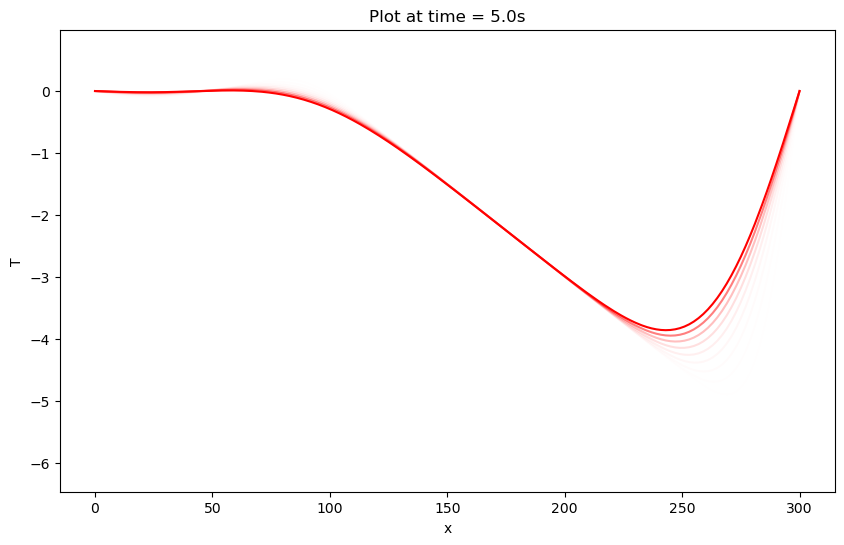

In [18]:
h_e.heat_plotter(Te_2,t_max,10)

### EX 4:

## Inviscid Burger's ##
# $u_{t}$ + $(u)u_{xx}$ = 0
# $\frac{\partial{u}}{\partial{t}}$ + $u$$\frac{\partial{u}}{\partial{x}}$ = 0

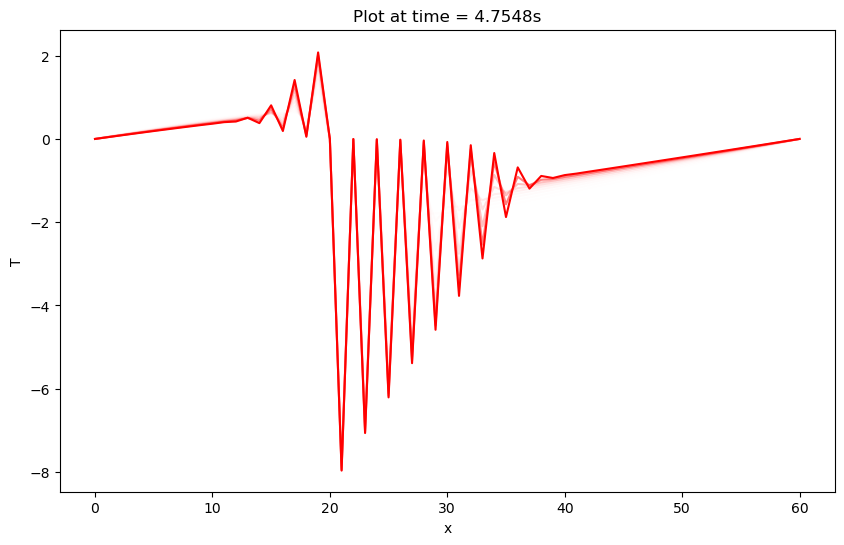

In [19]:
L = 3
t_max = 5

dx = .05
dt = .001

Nx = int(L/dx) + 1
Nt = int(t_max/dt)

x_grid = np.linspace(0,L,Nx)
t_grid = np.linspace(0,t_max,Nt)

U = []

u_t_x_0 = []

for x in x_grid:
    u_t_x_0.append(x*(x-1)*(x-3))
U.append(u_t_x_0)

for i in range(Nt):
    u_t_x = []
    
    u_line = U[-1]
    
    for j in range(1,Nx-1):
        # Equation 5.14 (slightly modified) to calculate u at each x value:
        u = -u_line[j] * (dt/(2*dx)) * (u_line[j+1] - u_line[j-1]) + u_line[j]
        # Append this value to the time step line
        u_t_x.append(u)
    # Append the first and last value with boundary conditions (0 in this case)
    u_t_x.insert(0,0)
    u_t_x.insert(len(u_line),0)

    # Now append the full solutions matrix
    U.append(u_t_x) 

# Can adjust the below parameters 
h_e.heat_plotter(U[:1000],t_max,20)

## AI/ML Example: Iris Classification

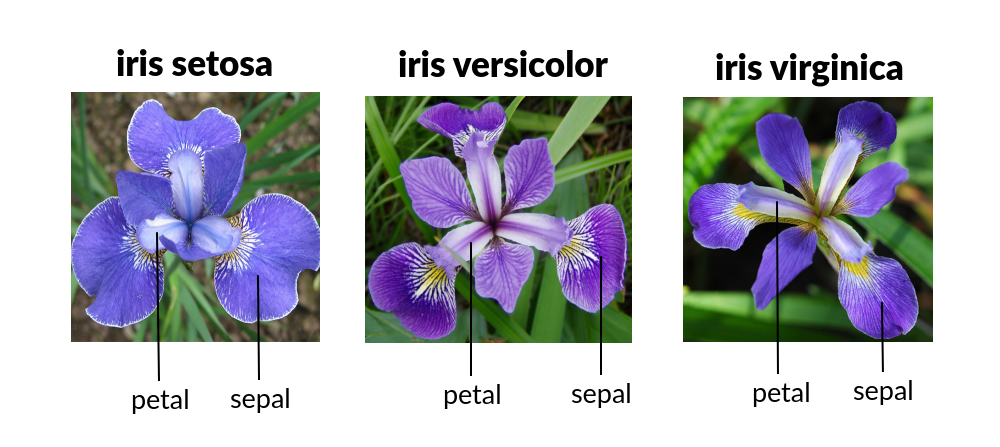

In [20]:
img_iris = Image.open('iris_pic.png')
display(img_iris)

In [21]:
import acquire
import prepare

In [22]:
df = acquire.get_iris_data()
df

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
145,3,virginica,146,6.7,3.0,5.2,2.3
146,3,virginica,147,6.3,2.5,5.0,1.9
147,3,virginica,148,6.5,3.0,5.2,2.0
148,3,virginica,149,6.2,3.4,5.4,2.3


In [23]:
df = prepare.prep_iris(df)

df

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,0,1
146,virginica,6.3,2.5,5.0,1.9,0,1
147,virginica,6.5,3.0,5.2,2.0,0,1
148,virginica,6.2,3.4,5.4,2.3,0,1


In [24]:
train, test = prepare.split_iris_data(df)

train.head(5)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
60,versicolor,5.0,2.0,3.5,1.0,1,0
16,setosa,5.4,3.9,1.3,0.4,0,0
88,versicolor,5.6,3.0,4.1,1.3,1,0
130,virginica,7.4,2.8,6.1,1.9,0,1
6,setosa,4.6,3.4,1.4,0.3,0,0


In [25]:
test.head(5)

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
72,versicolor,6.3,2.5,4.9,1.5,1,0
125,virginica,7.2,3.2,6.0,1.8,0,1
80,versicolor,5.5,2.4,3.8,1.1,1,0
86,versicolor,6.7,3.1,4.7,1.5,1,0
117,virginica,7.7,3.8,6.7,2.2,0,1


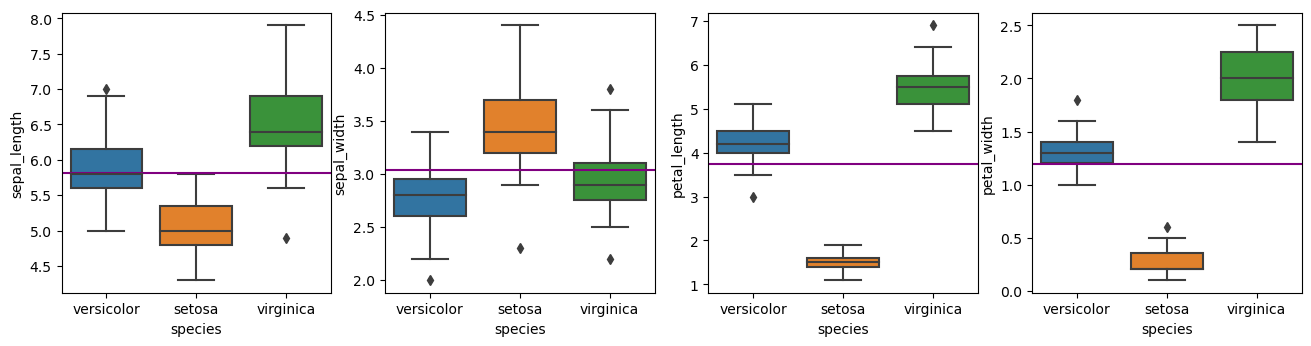

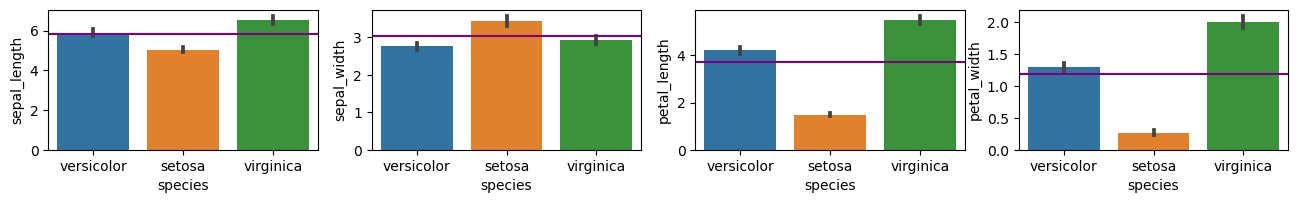

In [26]:
numcols = [col for col in train.columns if train[col].dtype == 'float']
catcols = [col for col in train.columns if train[col].dtype == 'object']
means = []
for i in range(len(numcols)):
    means.append(train[numcols[i]].mean())   
    
plt.figure(figsize = (16,8))
for x in range(4):
    plt.subplot(2,4,x+1)
    sns.boxplot(data = train, x = 'species', y = numcols[x])
    plt.axhline(means[x], c='purple')
plt.show()

plt.figure(figsize = (16,4))
for x in range(4):
    plt.subplot(2,4,x+1)
    sns.barplot(data = train, x = 'species', y = numcols[x])
    plt.axhline(means[x], c='purple')
plt.show()

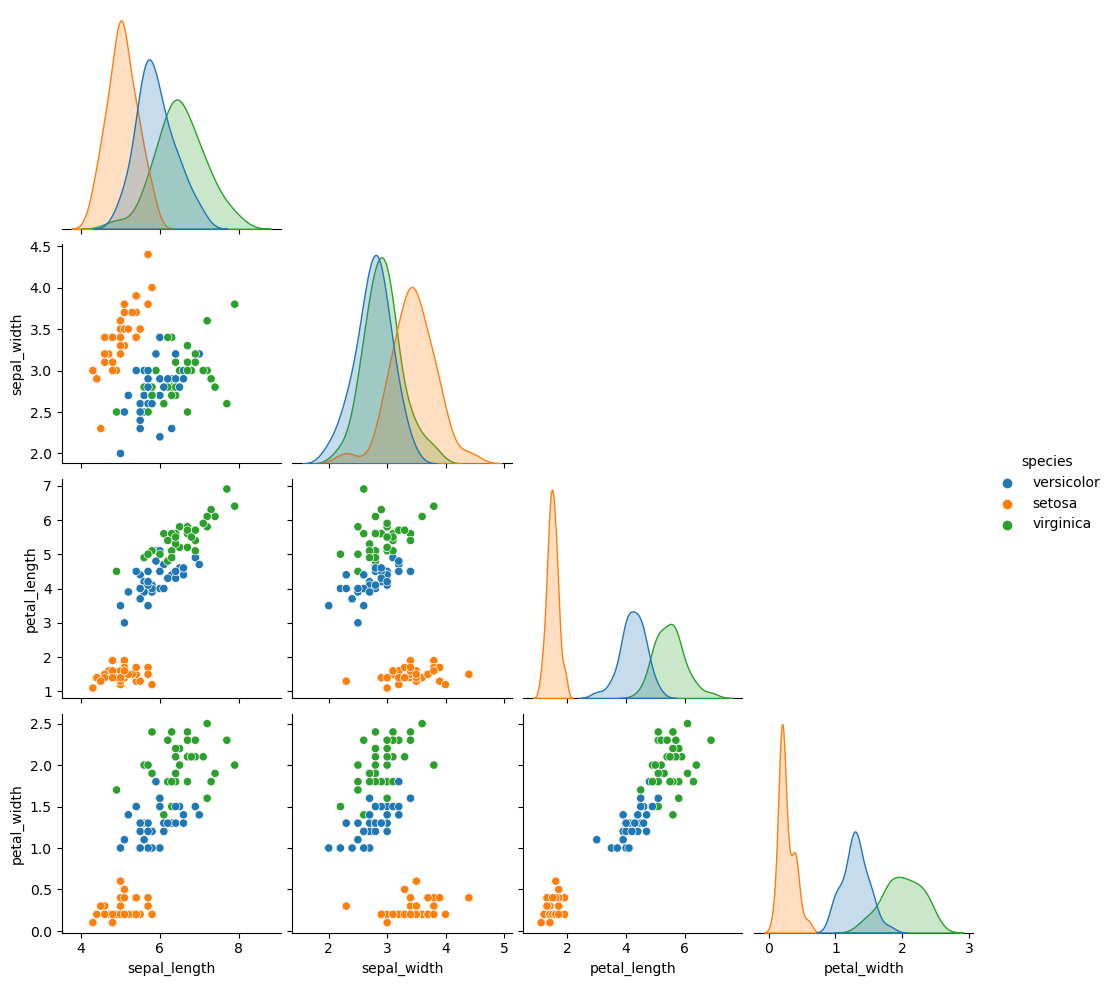

In [27]:
sns.pairplot(train.drop(columns=['species_versicolor','species_virginica']), corner=True, hue='species')

In [28]:
H0_1 = 'do not reject null hypothesis there is no difference between the mean of the two samples'
Ha_1 = 'we reject the null hypothesis and accept alternative hypothesis that there is a difference between the mean of the two samples'

versicolor_train = train[train.species == 'versicolor']
virginica_train = train[train.species == 'virginica']

virginica_train.drop(columns=['species_versicolor','species_virginica'], inplace=True)
versicolor_train.drop(columns=['species_versicolor','species_virginica'], inplace=True)

u, p = stats.mannwhitneyu(virginica_train.petal_length, versicolor_train.petal_length)

print('----------')
if p < .05:
    print(f'{p:.3f} is less than .05, therefore {Ha_1}')
else:
    print(f'{p:.3f} is greater than .05, therefore {H0_1}')
print('----------')

----------
0.000 is less than .05, therefore we reject the null hypothesis and accept alternative hypothesis that there is a difference between the mean of the two samples
----------


In [29]:
train_X = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # taking test data features
test_y =test.species   #output value of test data

In [30]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
#from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier

In [31]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9555555555555556


In [32]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


In [33]:
model=DecisionTreeClassifier(max_depth=2) # Goes down with each additional split
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


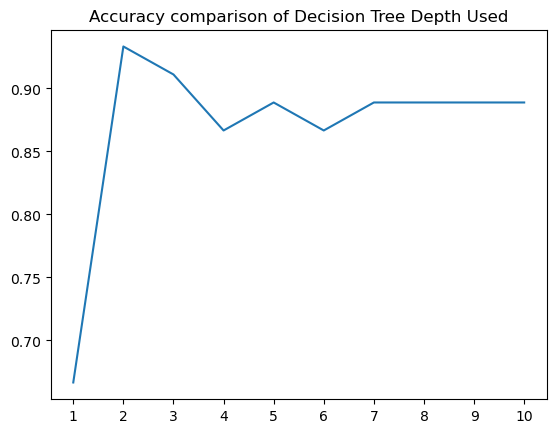

In [34]:
b_index=list(range(1,11))
b=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=DecisionTreeClassifier(max_depth=i) # Goes down with each additional split
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    b=b.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

plt.plot(b_index, b)
plt.xticks(x)
plt.title('Accuracy comparison of Decision Tree Depth Used')
plt.show()

In [35]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


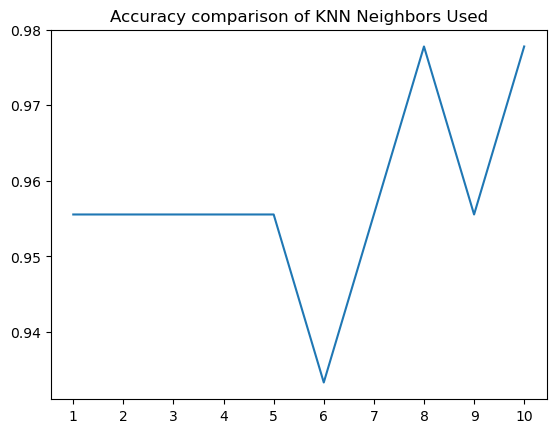

In [36]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.title('Accuracy comparison of KNN Neighbors Used')
plt.show()

## import pytorch...
A baby step to running a CNN.